In [1]:
import os
import collections
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
jsons = [e for e in sorted(os.listdir()) if all([e.startswith('MVPA'), e.endswith('json')])]
results_tables = dict()
for k in ['1', '2', 'macro avg', 'weighted avg']:
    for c in ['precision', 'recall', 'f1-score']:
        results_tables['{}-{}'.format(k, c)] = pd.DataFrame()
results_tables['accuracy'] = pd.DataFrame()

In [3]:
def time_report(y_preds, y_true, axes, label=''):
    f1 = np.zeros(y_preds.shape[0])
    recall = np.zeros(y_preds.shape[0])
    accuracy = np.zeros(y_preds.shape[0])
    
    for j, y_pred in enumerate(y_preds):
        f1[j] = sklearn.metrics.f1_score(y_pred=y_pred, y_true=y_true, pos_label=1)
        recall[j] = sklearn.metrics.recall_score(y_pred=y_pred, y_true=y_true, pos_label=1)
        accuracy[j] = sklearn.metrics.accuracy_score(y_pred=y_pred, y_true=y_true)
        
    axes[0].plot(f1, label=label)
    axes[1].plot(recall, label=label)
    axes[2].plot(accuracy, label=label)
    
    return dict(f1=f1, recall=recall, acccuracy=accuracy)

--------------------------------------------------------------------------------
MEG_S01
Delta
Theta
Alpha
Cb_U07
Cb_U30


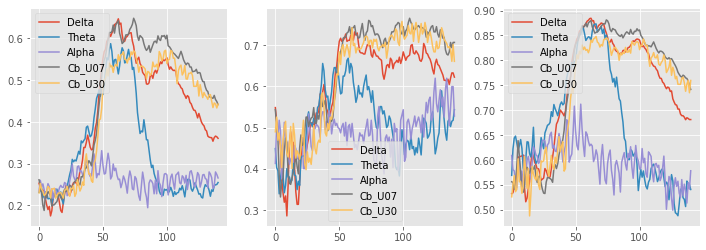

--------------------------------------------------------------------------------
MEG_S02
Delta
Theta
Alpha
Cb_U07
Cb_U30


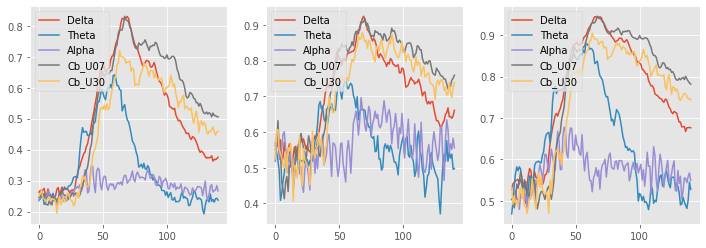

--------------------------------------------------------------------------------
MEG_S03
Delta
Theta
Alpha
Cb_U07
Cb_U30


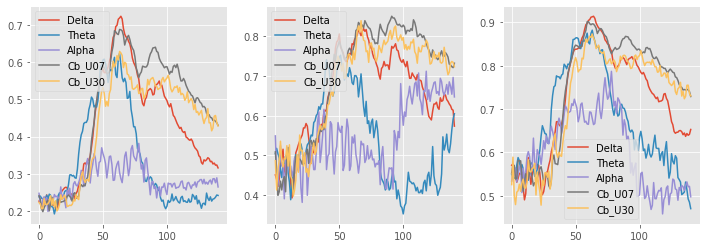

--------------------------------------------------------------------------------
MEG_S04
Delta
Theta
Alpha
Cb_U07
Cb_U30


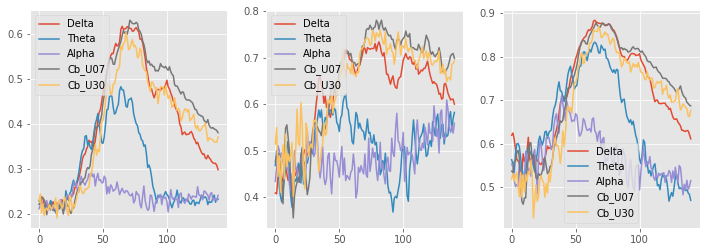

--------------------------------------------------------------------------------
MEG_S05
Delta
Theta
Alpha
Cb_U07
Cb_U30


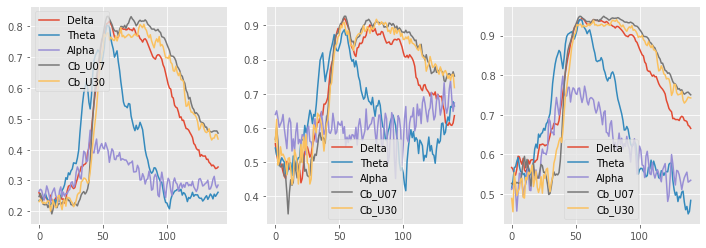

--------------------------------------------------------------------------------
MEG_S06
Delta
Theta
Alpha
Cb_U07
Cb_U30


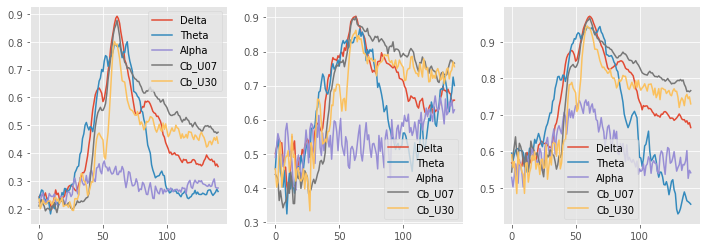

--------------------------------------------------------------------------------
MEG_S07
Delta
Theta
Alpha
Cb_U07
Cb_U30


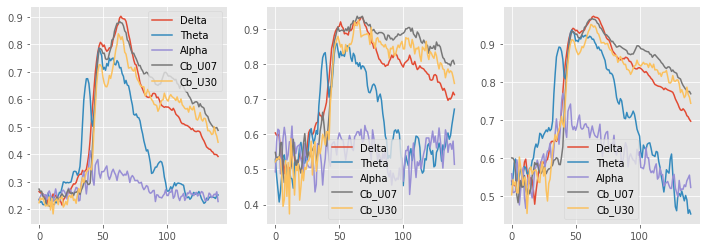

--------------------------------------------------------------------------------
MEG_S08
Delta
Theta
Alpha
Cb_U07
Cb_U30


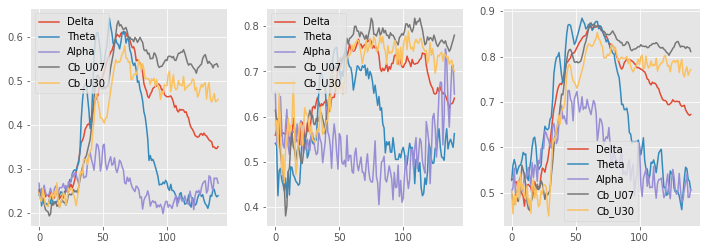

--------------------------------------------------------------------------------
MEG_S09
Delta
Theta
Alpha
Cb_U07
Cb_U30


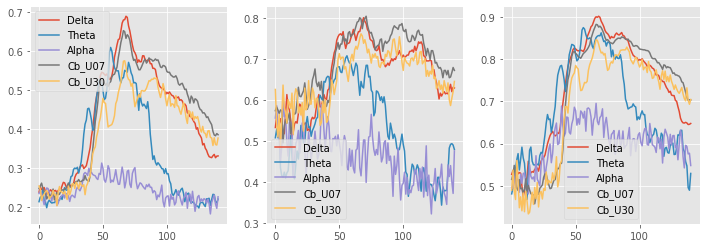

--------------------------------------------------------------------------------
MEG_S10
Delta
Theta
Alpha
Cb_U07
Cb_U30


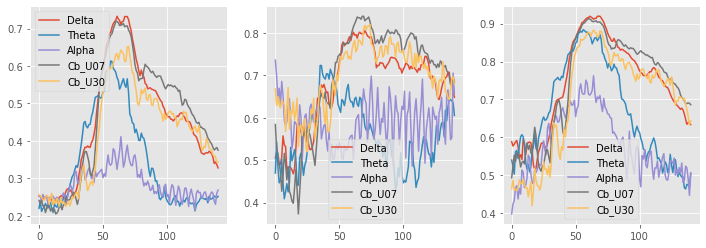

In [4]:
plt.style.use('ggplot')

results_time = collections.defaultdict(dict)

for fname in jsons:
    exper = fname[-12:-5]
    if exper.startswith('EEG'):
        continue
    print('-' * 80)
    print(exper)
    df = pd.read_json(fname)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    for freq in df.index:
        print(freq)
        y_true = df['y_true'][freq]
        y_pred = df['y_predict'][freq]
        y_pred_time = np.array(df['y_time_predict'][freq]).transpose()
        p = sklearn.metrics.classification_report(y_pred=y_pred, y_true=y_true, output_dict=True)
        
        results_time[fname][freq] = time_report(y_pred_time, y_true, axes, label=freq)

        for kc in results_tables:
            if exper not in results_tables[kc].index:
                results_tables[kc] = results_tables[kc].append(pd.Series(name=exper))
            if freq not in results_tables[kc].columns:
                results_tables[kc].insert(loc=len(results_tables[kc].columns), column=freq, value='--')
                
            if kc == 'accuracy':
                results_tables[kc][freq][exper] = p[kc]
            else:
                k, c = kc.split('-', 1)
                results_tables[kc][freq][exper] = p[k][c]
            
            results_tables[kc] = results_tables[kc].sort_index()
    for ax in axes:
        ax.legend()
    plt.show()

In [ ]:
for kc in results_tables:
    indexs = results_tables[kc].index
    for EM in ['EEG', 'MEG']:
        _rows = results_tables[kc].loc[[e for e in indexs if e.startswith(EM)]]
        _mean = _rows.mean()
        _mean.name = '{}_mean'.format(EM)
        results_tables[kc] = results_tables[kc].append(_mean)

In [ ]:
with open('summary.html', 'w') as f:
    for kc in results_tables:
        f.writelines([
            '<h1>{}</h1>\n'.format(kc),
            results_tables[kc].to_html(),
            '\n\n'
        ])

In [ ]:
for kc in results_tables:
    print(kc)
    mat = results_tables[kc].to_numpy().astype('float')
    freqs = results_tables[kc].columns
    subjs = results_tables[kc].index
    
    fig = plt.figure(figsize=(8, 10))
    ax = fig.subplots()
    im = ax.imshow(mat, cmap=plt.get_cmap('afmhot'))
    
    ax.set_xticks(np.arange(len(freqs)))
    ax.set_yticks(np.arange(len(subjs)))
    ax.set_ylim((len(subjs)-0.5, -0.5))
    ax.set_xticklabels(freqs)
    ax.set_yticklabels(subjs)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
         rotation_mode='anchor')
    
    for i in range(len(subjs)):
        for j in range(len(freqs)):
            text = ax.text(j, i, '{:.2f}'.format(mat[i, j]),
                           ha='center', va='center', color='k')
    
    fig.tight_layout()
    plt.show()